Introduction
Breast cancer is one of the most common cancers affecting women worldwide. Early detection is crucial for effective treatment and improved survival rates. This project aims to build and compare three different models—Logistic Regression, Naive Bayes, and Convolutional Neural Networks (CNN)—to predict whether a person is suffering from breast cancer based on various medical attributes.

Environment Setup
First, ensure that all necessary libraries are installed. If you're using Kaggle, most of these libraries are pre-installed. Otherwise, you can install any missing libraries using pip.

In [10]:
# Install required libraries (uncomment if needed)
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn imbalanced-learn


Import necessary Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import layers, models


Data Loading And Exploration

In [12]:
# Load the dataset
#give the path to made variable
file_path = '/content/Breast_cancer_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  

Note: Ensure that the dataset contains a target column indicating the presence of breast cancer (e.g., target). If your target column has a different name, replace 'target' accordingly in the code below.

Exploratory Data Analysis (EDA)
Visualize the distribution of features and check for class imbalance.


Missing Values in Each Column:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


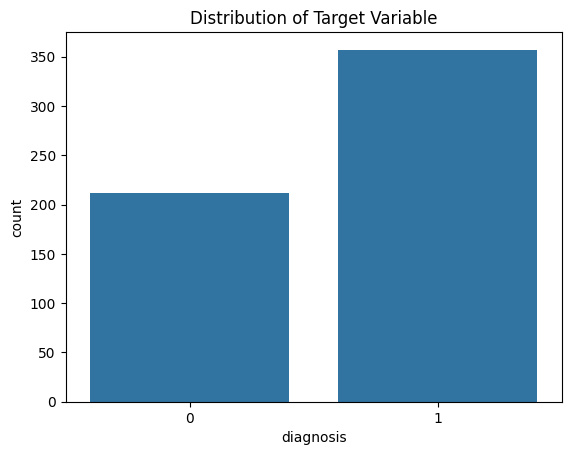

In [13]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Distribution of target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot to visualize relationships (optional, can be time-consuming for large datasets)
# sns.pairplot(df, hue='target')
# plt.show()



In [6]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
print(f"Naive Bayes - Accuracy: {nb_accuracy}, ROC-AUC: {nb_roc_auc}")


Naive Bayes - Accuracy: 0.9473684210526315, ROC-AUC: 0.9302325581395349


Data Preprocessing and Augmentation
Preprocess the data by handling missing values, encoding categorical variables, scaling features, and applying data augmentation techniques like SMOTE and adding Gaussian noise.

In [16]:
# Define feature matrix X and target vector y
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Split the data into training and testing sets (before augmentation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training set size: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set size: {X_train_smote.shape}, {y_train_smote.shape}")

# Adding Gaussian Noise for Data Augmentation
def add_gaussian_noise(X, mean=0, std=0.01):
    noise = np.random.normal(mean, std, X.shape)
    return X + noise

X_train_augmented = add_gaussian_noise(X_train_smote)

# Further split the augmented data into training and validation sets
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train_augmented, y_train_smote, test_size=0.2, random_state=42)

print(f"\nFinal training set size: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation set size: {X_valid.shape}, {y_valid.shape}")



Original training set size: (455, 5), (455,)
Resampled training set size: (572, 5), (572,)

Final training set size: (457, 5), (457,)
Validation set size: (115, 5), (115,)


**Model** **Training**

Train three different models: Logistic Regression, Naive Bayes, and CNN.

**Logistic Regression**

In [17]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_final, y_train_final)

# Predictions on validation set
y_pred_lr = lr_model.predict(X_valid)

# Evaluation
lr_accuracy = accuracy_score(y_valid, y_pred_lr)
lr_roc_auc = roc_auc_score(y_valid, y_pred_lr)

print(f"\nLogistic Regression - Accuracy: {lr_accuracy:.4f}, ROC-AUC: {lr_roc_auc:.4f}")



Logistic Regression - Accuracy: 0.9304, ROC-AUC: 0.9304


**Naive Bayes**

In [18]:
# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_final, y_train_final)

# Predictions on validation set
y_pred_nb = nb_model.predict(X_valid)

# Evaluation
nb_accuracy = accuracy_score(y_valid, y_pred_nb)
nb_roc_auc = roc_auc_score(y_valid, y_pred_nb)

print(f"\nNaive Bayes - Accuracy: {nb_accuracy:.4f}, ROC-AUC: {nb_roc_auc:.4f}")



Naive Bayes - Accuracy: 0.8957, ROC-AUC: 0.8952


**CNN**

In [27]:
# Reshape data for CNN
X_train_cnn = X_train_final.reshape(-1, X_train_final.shape[1], 1)
X_valid_cnn = X_valid.reshape(-1, X_valid.shape[1], 1)

# Build CNN model
cnn_model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=2, activation='relu', padding = 'same'),
    layers.MaxPooling1D(pool_size=1),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(
    X_train_cnn, y_train_final,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_cnn, y_valid),
    verbose=1
)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_valid_cnn, y_valid, verbose=0)
y_pred_cnn_prob = cnn_model.predict(X_valid_cnn).flatten()
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)
cnn_roc_auc = roc_auc_score(y_valid, y_pred_cnn)

print(f"\nCNN - Accuracy: {cnn_accuracy:.4f}, ROC-AUC: {cnn_roc_auc:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8029 - loss: 0.6604 - val_accuracy: 0.8435 - val_loss: 0.5680
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8585 - loss: 0.5478 - val_accuracy: 0.8522 - val_loss: 0.4397
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8895 - loss: 0.4213 - val_accuracy: 0.8609 - val_loss: 0.3285
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8870 - loss: 0.2985 - val_accuracy: 0.8957 - val_loss: 0.2741
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8738 - loss: 0.2725 - val_accuracy: 0.8870 - val_loss: 0.2773
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.2835 - val_accuracy: 0.8870 - val_loss: 0.2696
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9125 - loss: 0.2195 - val_accuracy: 0.8870 - val_loss: 0.2785
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 0.2544 - val_accuracy: 0.8696 - val_loss

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

CNN - Accuracy: 0.8783, ROC-AUC: 0.8784


Model Evaluation and Comparison
Compare the performance of the three models using accuracy and ROC-AUC metrics. Additionally, visualize ROC curves and confusion matrices for a more comprehensive evaluation.


In [28]:
# Compile results into a DataFrame
results = {
    "Model": ["Logistic Regression", "Naive Bayes", "CNN"],
    "Accuracy": [lr_accuracy, nb_accuracy, cnn_accuracy],
    "ROC-AUC": [lr_roc_auc, nb_roc_auc, cnn_roc_auc]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.930435  0.930430
1          Naive Bayes  0.895652  0.895191
2                  CNN  0.878261  0.878403


Visualizing ROC Curves

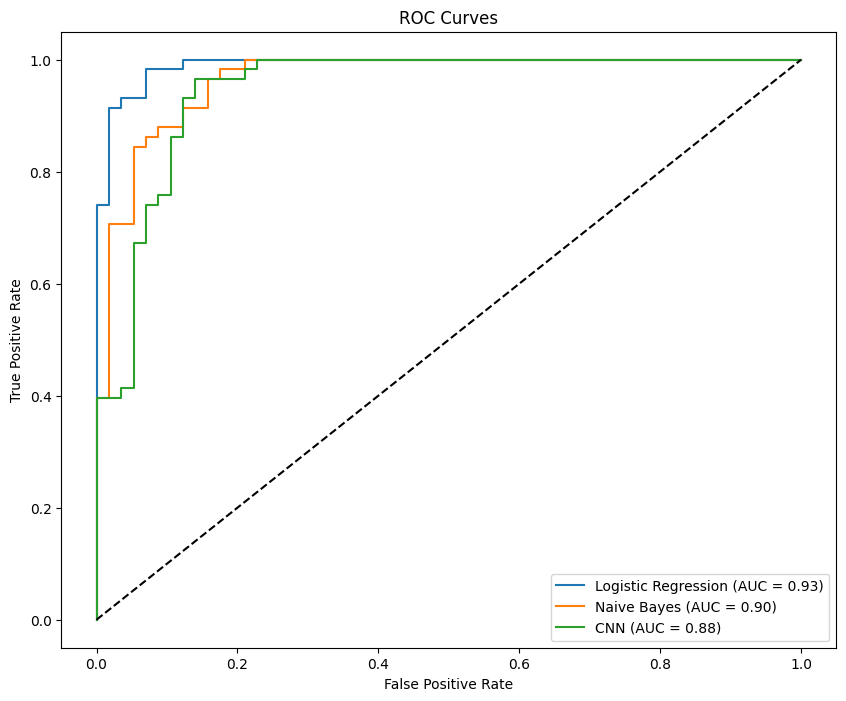

In [29]:
# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_valid, lr_model.predict_proba(X_valid)[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_valid, nb_model.predict_proba(X_valid)[:,1])
fpr_cnn, tpr_cnn, _ = roc_curve(y_valid, y_pred_cnn_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {cnn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Visualizing Confusion Matrices

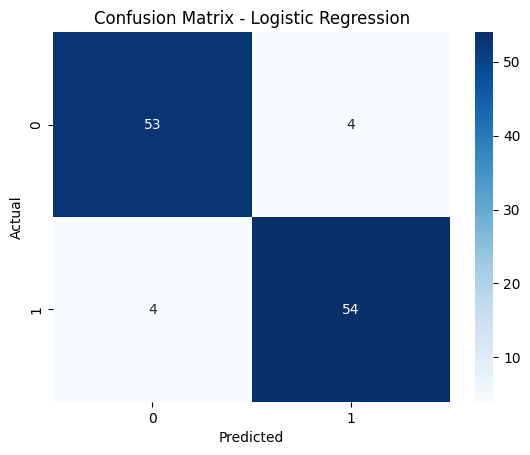

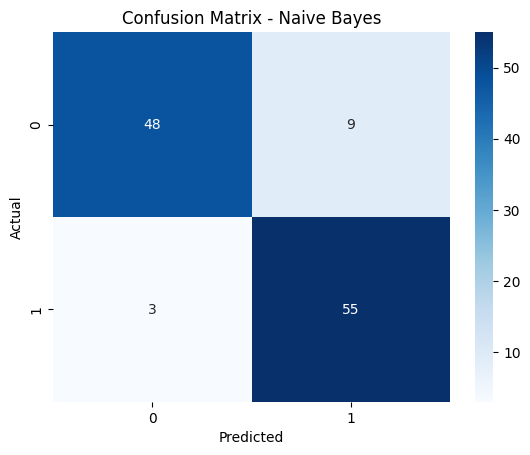

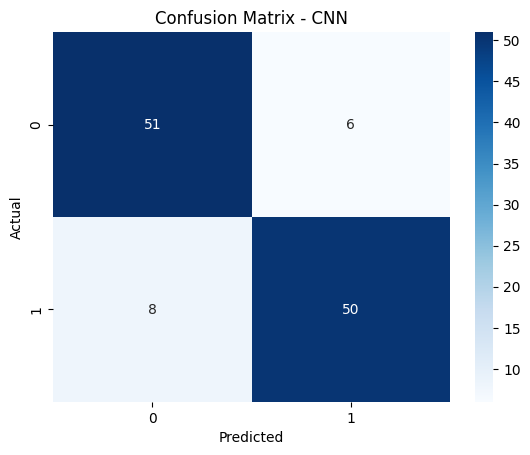

In [30]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrices for each model
plot_confusion_matrix(y_valid, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_valid, y_pred_nb, "Naive Bayes")
plot_confusion_matrix(y_valid, y_pred_cnn, "CNN")


Making Predictions
After training and evaluating your models, you can use them to make predictions on new, unseen data. Ensure that the new data undergoes the same preprocessing steps as the training data.

In [34]:
import numpy as np

# Suppose you have a new data point with 30 features
new_data_example = np.array([[13.54, 14.36, 87.46, 700.1, 0.09779]])

# Preprocess the new data
new_data_scaled = scaler.transform(new_data_example)

# Logistic Regression Prediction
prediction_lr = lr_model.predict(new_data_scaled)
probability_lr = lr_model.predict_proba(new_data_scaled)[:, 1]

print(f"\nLogistic Regression Prediction: {prediction_lr[0]}")
print(f"Logistic Regression Probability: {probability_lr[0]:.4f}")

# Naive Bayes Prediction
prediction_nb = nb_model.predict(new_data_scaled)
probability_nb = nb_model.predict_proba(new_data_scaled)[:, 1]

print(f"\nNaive Bayes Prediction: {prediction_nb[0]}")
print(f"Naive Bayes Probability: {probability_nb[0]:.4f}")

# CNN Prediction
new_data_cnn = new_data_scaled.reshape(-1, new_data_scaled.shape[1], 1)
probability_cnn = cnn_model.predict(new_data_cnn).flatten()[0]
prediction_cnn = int(probability_cnn > 0.5)

print(f"\nCNN Prediction: {prediction_cnn}")
print(f"CNN Probability: {probability_cnn:.4f}")



Logistic Regression Prediction: 1
Logistic Regression Probability: 0.8725

Naive Bayes Prediction: 1
Naive Bayes Probability: 0.9647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

CNN Prediction: 1
CNN Probability: 0.9308


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
